In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv("C:\\Users\\utsav\\AppData\\Roaming\\Microsoft\\Windows\\Network Shortcuts\\Tweets.csv\\Tweets.csv")
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
df.shape

(14640, 15)

In [7]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [8]:
df.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [12]:
mood_count = df.airline_sentiment.value_counts()
print(mood_count)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


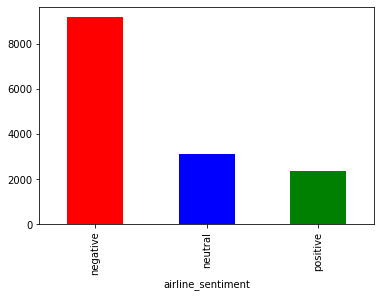

In [13]:
df_2 = df.groupby("airline_sentiment")["airline_sentiment"].count()
print(df_2)
df_2.plot.bar(color = ["red", "blue", "green"])


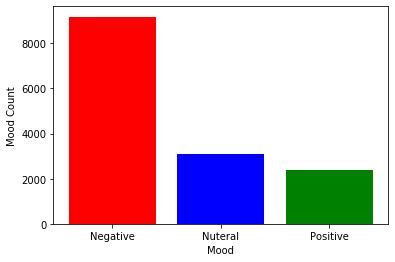

In [14]:

mood_count_position = [x for x,y in enumerate(mood_count)]
plt.bar(mood_count_position , mood_count, color = ["red", "blue", "green"])
plt.xlabel("Mood")
plt.ylabel("Mood Count")
plt.xticks(mood_count_position ,["Negative" , "Nuteral" , "Positive"])

plt.show()


United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


Text(0, 0.5, 'Count of the tweet of each airlines')

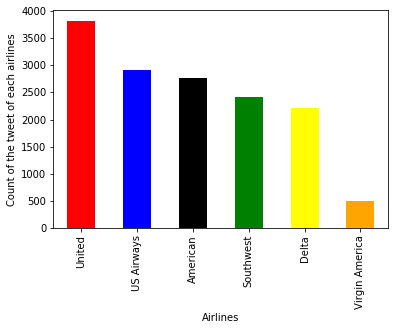

In [18]:

df_3 = df["airline"].value_counts()
print(df_3)
df_3.plot.bar(color = ["red", "blue" ,"black", "green", "yellow", "orange"])
plt.xlabel("Airlines")
plt.ylabel("Count of the tweet of each airlines")



In [22]:
df_ = df[df["airline"] == "United"]["airline_sentiment"]
count = df_.value_counts()


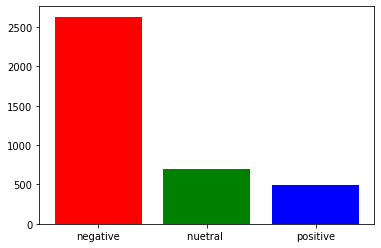

In [23]:

ind = [x for x, y in enumerate(count)]
plt.bar(ind, count, color = ["red" ,"green" , "blue"])
plt.xticks(ind ,["negative", "nuetral ","positive"])
plt.show()

In [36]:

def plot_for_each_airline(airline):
    df_4 = df[df["airline"] == airline]["airline_sentiment"]
    count = df_4.value_counts()
    ind = [x for x,y in enumerate(count)]
    plt.bar(ind, count,  color = ["red", "green", "yellow"])
    plt.xticks(ind ,["negative" ,"nuetral" ,"positive"])
    plt.title("Count of mood of "+ airline)
    plt.ylabel("Mood Count")
    plt.xlabel("Mood")
    plt.figure(1,figsize=(120, 120))
    plt.show()


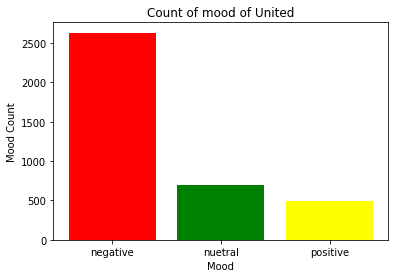

In [37]:
plot_for_each_airline("United")

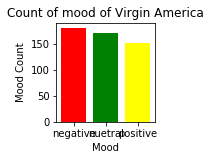

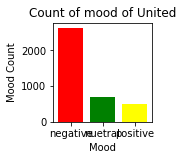

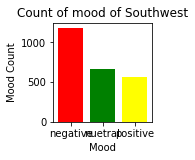

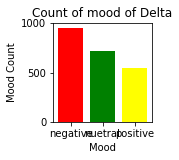

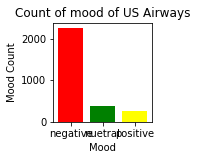

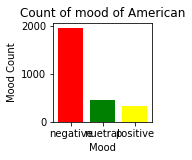

In [38]:

new_list = df["airline"].unique()

for x,y in enumerate(new_list):
    plt.subplot(2,3,x+1)
    plot_for_each_airline(y)


In [32]:
negative_reviews = dict(df["negativereason"].value_counts(sort= False))
print(negative_reviews)

{'Bad Flight': 580, "Can't Tell": 1190, 'Customer Service Issue': 2910, 'Flight Attendant Complaints': 481, 'Damaged Luggage': 74, 'longlines': 178, 'Late Flight': 1665, 'Lost Luggage': 724, 'Cancelled Flight': 847, 'Flight Booking Problems': 529}


In [33]:

def NR_Count(Airline):
    if Airline=='All':
        df_5=df
    else:
        df_5=df[df['airline']==Airline]
    count=dict(df_5['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame


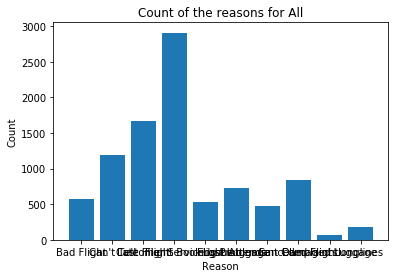

In [41]:

def plot_reason(Airline):
    df_5 = NR_Count(Airline)
    count_ = df_5["count"]
    index = range(1,len(df_5)+1)
    plt.bar(index,count_)
    plt.xlabel("Reason")
    plt.ylabel("Count")
    plt.title("Count of the reasons for " + Airline)
    plt.xticks(index, df_5["Reasons"])
    plt.figure(1,figsize =(120,120))
    plt.show()   
plot_reason("All")



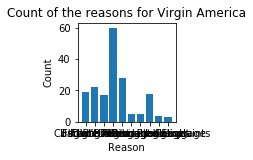

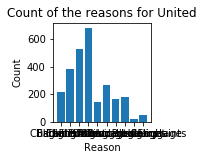

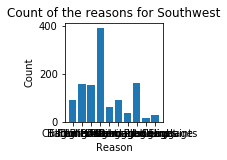

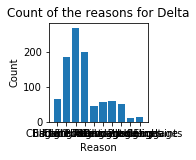

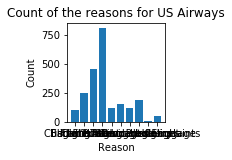

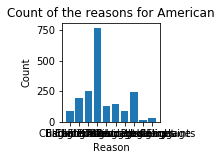

In [42]:

new_list = df["airline"].unique()
for x,a in enumerate(new_list):
    plt.subplot(2,3,x+1)
    plot_reason(a)
    